Solar Radiation - Mean: 0.23001461719939115, Median: 0.219989, Std Dev: 0.056001926932629634
Ozone Concentration - Mean: 0.042317452292617956, Median: 0.042432, Std Dev: 0.004876031424542902
Pearson Correlation: 0.18141091572204482, p-value: 5.299238023021918e-155
Spearman Correlation: 0.18261623521488943, p-value: 4.4647104813096555e-157
Linear Regression Coefficients: [0.01579527]
Linear Regression Intercept: 0.0386843102571637


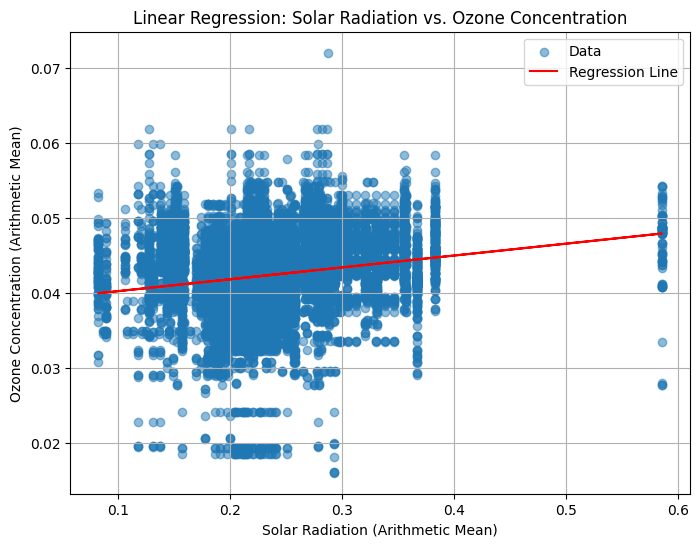

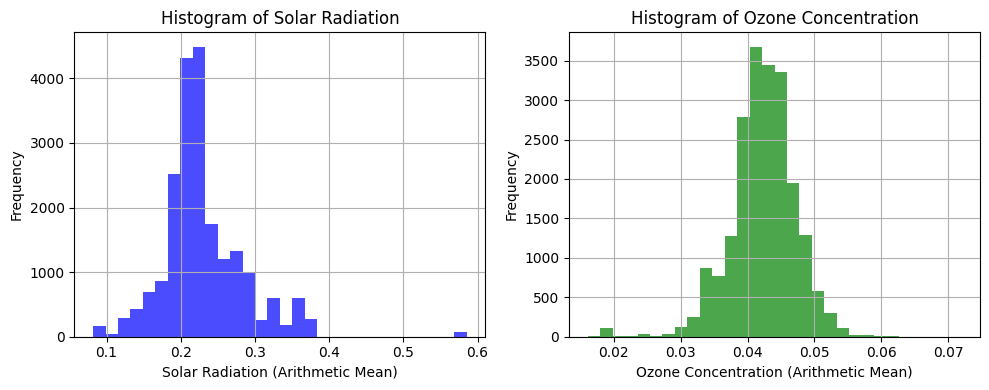

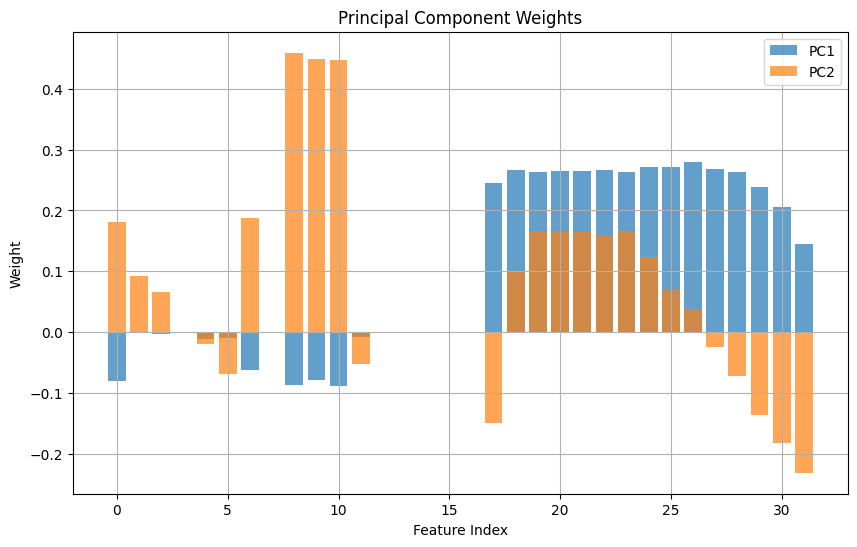

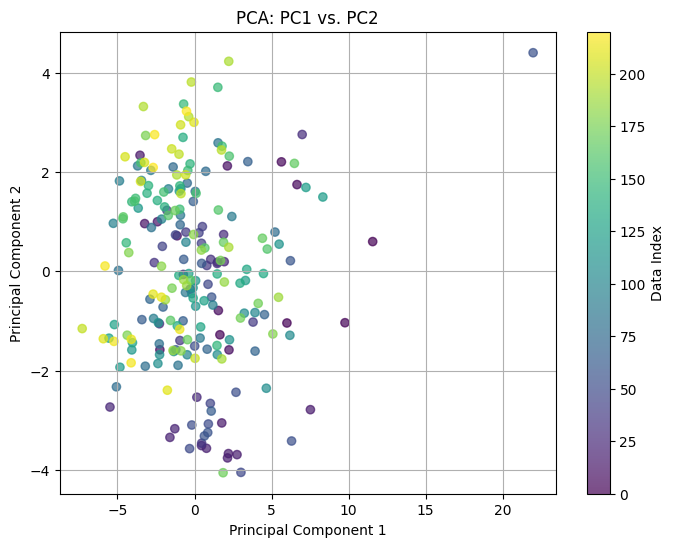

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "EPA air quality data.csv"
data = pd.read_csv(file_path)

# Extract relevant data for Solar Radiation and Ozone
solar_data = data[data['Parameter Name'].str.contains('Solar radiation', case=False)]
ozone_data = data[data['Parameter Name'].str.contains('Ozone', case=False)]

# Merge datasets on relevant columns like 'Date of Last Change'
merged_data = pd.merge(
    solar_data[['Arithmetic Mean', 'Date of Last Change']],
    ozone_data[['Arithmetic Mean', 'Date of Last Change']],
    on='Date of Last Change',
    suffixes=('_Solar', '_Ozone')
).dropna()

# Extract relevant variables
solar_col = 'Arithmetic Mean_Solar'
ozone_col = 'Arithmetic Mean_Ozone'

# Calculate statistics for Solar Radiation
solar_mean = merged_data[solar_col].mean()
solar_median = merged_data[solar_col].median()
solar_std = merged_data[solar_col].std()

# Calculate statistics for Ozone Concentration
ozone_mean = merged_data[ozone_col].mean()
ozone_median = merged_data[ozone_col].median()
ozone_std = merged_data[ozone_col].std()

# Print statistics
print(f"Solar Radiation - Mean: {solar_mean}, Median: {solar_median}, Std Dev: {solar_std}")
print(f"Ozone Concentration - Mean: {ozone_mean}, Median: {ozone_median}, Std Dev: {ozone_std}")

# Calculate Pearson and Spearman correlations
pearson_corr, pearson_p = pearsonr(merged_data[solar_col], merged_data[ozone_col])
spearman_corr, spearman_p = spearmanr(merged_data[solar_col], merged_data[ozone_col])

# Print correlations
print(f"Pearson Correlation: {pearson_corr}, p-value: {pearson_p}")
print(f"Spearman Correlation: {spearman_corr}, p-value: {spearman_p}")

# Perform Linear Regression
X = merged_data[[solar_col]].values
y = merged_data[ozone_col].values
reg = LinearRegression()
reg.fit(X, y)
coefficients = reg.coef_
intercept = reg.intercept_

# Print regression results
print(f"Linear Regression Coefficients: {coefficients}")
print(f"Linear Regression Intercept: {intercept}")

# Generate scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(merged_data[solar_col], merged_data[ozone_col], label='Data', alpha=0.5)
plt.plot(merged_data[solar_col], reg.predict(X), color='red', label='Regression Line')
plt.xlabel("Solar Radiation (Arithmetic Mean)")
plt.ylabel("Ozone Concentration (Arithmetic Mean)")
plt.title("Linear Regression: Solar Radiation vs. Ozone Concentration")
plt.legend()
plt.grid(True)
plt.show()

# Create histograms
plt.figure(figsize=(10, 4))

# Histogram for Solar Radiation
plt.subplot(1, 2, 1)
plt.hist(merged_data[solar_col], bins=30, alpha=0.7, color='blue')
plt.title("Histogram of Solar Radiation")
plt.xlabel("Solar Radiation (Arithmetic Mean)")
plt.ylabel("Frequency")
plt.grid(True)

# Histogram for Ozone Concentration
plt.subplot(1, 2, 2)
plt.hist(merged_data[ozone_col], bins=30, alpha=0.7, color='green')
plt.title("Histogram of Ozone Concentration")
plt.xlabel("Ozone Concentration (Arithmetic Mean)")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()

# Principal Component Analysis (PCA) for all quantitative variables
quantitative_data = data.select_dtypes(include=[np.number]).dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(quantitative_data)

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)
pc_weights = pca.components_

# Plot PCA weights
plt.figure(figsize=(10, 6))
plt.bar(range(len(pc_weights[0])), pc_weights[0], alpha=0.7, label='PC1')
plt.bar(range(len(pc_weights[1])), pc_weights[1], alpha=0.7, label='PC2')
plt.xlabel("Feature Index")
plt.ylabel("Weight")
plt.title("Principal Component Weights")
plt.legend()
plt.grid(True)
plt.show()

# Visualize data on PC1 and PC2
plt.figure(figsize=(8, 6))
categories = np.arange(len(pca_results))  # Example categories; replace with relevant grouping if available
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=categories, cmap='viridis', alpha=0.7)
plt.colorbar(label='Data Index')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: PC1 vs. PC2")
plt.grid(True)
plt.show()